<a href="https://colab.research.google.com/github/medsellufbc/BMI/blob/main/SEIRD_P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

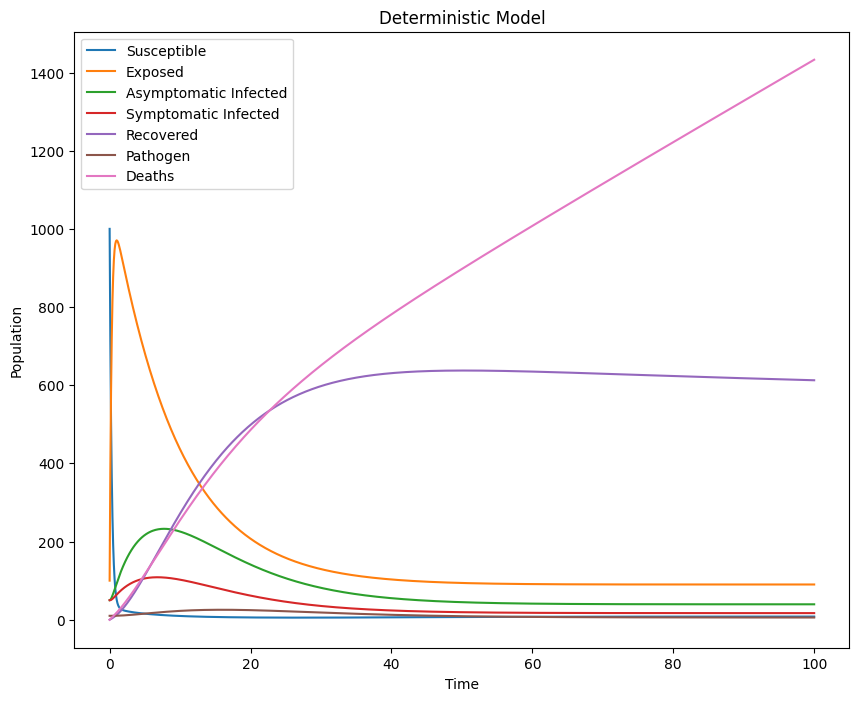

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parameters
b = 10       # Birth rate
beta1 = 0.1  # Transmission rate through direct contact
beta2 = 0.05 # Transmission rate through infected individuals
alpha1 = 0.01
alpha2 = 0.01
psi = 0.1    # Transition rate from exposed to susceptible
mu = 0.01    # Natural death rate
omega = 0.1  # Progression rate from exposed to infected
delta = 0.3  # Proportion of exposed becoming symptomatic
sigma = 0.05 # Disease-induced death rate
gamma_A = 0.1 # Recovery rate of asymptomatic infected
gamma_S = 0.1 # Recovery rate of symptomatic infected
eta_A = 0.01 # Pathogen production rate by asymptomatic infected
eta_S = 0.01 # Pathogen production rate by symptomatic infected
mu_P = 0.1   # Pathogen decay rate

# Initial values
initial_S = 1000
initial_E = 100
initial_I_A = 50
initial_I_S = 50
initial_R = 0
initial_P = 10
initial_D = 0

# Time points
t = np.linspace(0, 100, 1000)

# Differential equations
def model(y, t, b, beta1, beta2, alpha1, alpha2, psi, mu, omega, delta, sigma, gamma_A, gamma_S, eta_A, eta_S, mu_P):
    S, E, I_A, I_S, R, P, D = y

    dSdt = b - (beta1 * S * P) / (1 + alpha1 * P) - (beta2 * S * (I_A + I_S)) / (1 + alpha2 * (I_A + I_S)) + psi * E - mu * S
    dEdt = (beta1 * S * P) / (1 + alpha1 * P) + (beta2 * S * (I_A + I_S)) / (1 + alpha2 * (I_A + I_S)) - psi * E - mu * E - omega * E
    dI_Adt = (1 - delta) * omega * E - (mu + sigma) * I_A - gamma_A * I_A
    dI_Sdt = delta * omega * E - (mu + sigma) * I_S - gamma_S * I_S
    dRdt = gamma_S * I_S + gamma_A * I_A - mu * R
    dPdt = eta_A * I_A + eta_S * I_S - mu_P * P
    dDdt = mu * S + mu * E + (mu + sigma) * I_A + (mu + sigma) * I_S + mu * R

    return [dSdt, dEdt, dI_Adt, dI_Sdt, dRdt, dPdt, dDdt]

# Initial condition vector
y0 = [initial_S, initial_E, initial_I_A, initial_I_S, initial_R, initial_P, initial_D]

# Integrate the ODEs
solution = odeint(model, y0, t, args=(b, beta1, beta2, alpha1, alpha2, psi, mu, omega, delta, sigma, gamma_A, gamma_S, eta_A, eta_S, mu_P))
S, E, I_A, I_S, R, P, D = solution.T

# Plotting the results
plt.figure(figsize=(10, 8))
plt.plot(t, S, label='Susceptible')
plt.plot(t, E, label='Exposed')
plt.plot(t, I_A, label='Asymptomatic Infected')
plt.plot(t, I_S, label='Symptomatic Infected')
plt.plot(t, R, label='Recovered')
plt.plot(t, P, label='Pathogen')
plt.plot(t, D, label='Deaths')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('Deterministic Model')
plt.show()



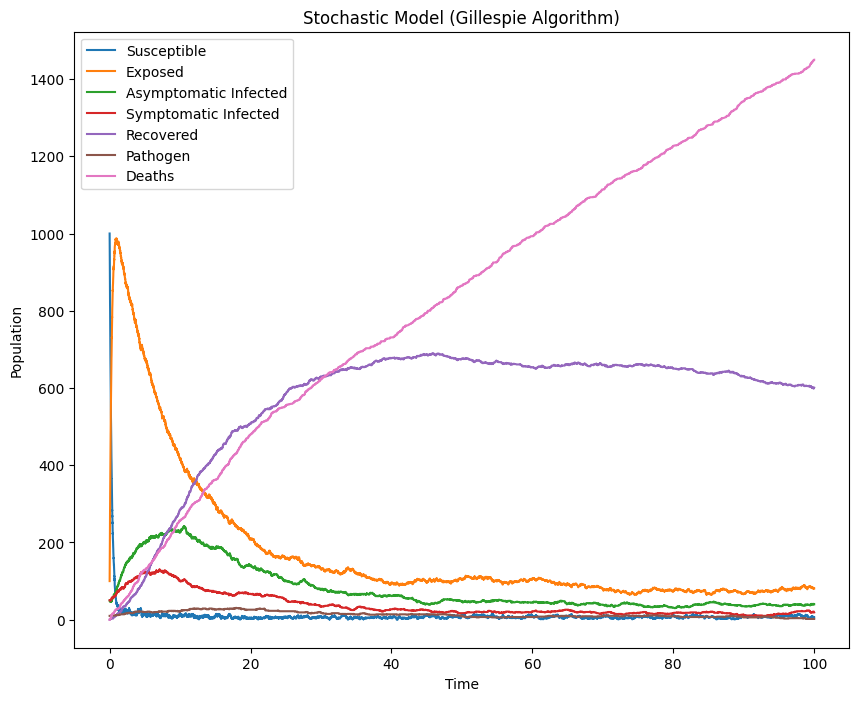

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Parameters (same as above)
b = 10
beta1 = 0.1
beta2 = 0.05
alpha1 = 0.01
alpha2 = 0.01
psi = 0.1
mu = 0.01
omega = 0.1
delta = 0.3
sigma = 0.05
gamma_A = 0.1
gamma_S = 0.1
eta_A = 0.01
eta_S = 0.01
mu_P = 0.1

# Initial values
S = initial_S
E = initial_E
I_A = initial_I_A
I_S = initial_I_S
R = initial_R
P = initial_P
D = initial_D

# Time parameters
max_time = 100
time = 0
times = [time]

# Population lists for plotting
S_list = [S]
E_list = [E]
I_A_list = [I_A]
I_S_list = [I_S]
R_list = [R]
P_list = [P]
D_list = [D]

while time < max_time:
    # Calculate propensities
    a1 = b
    a2 = (beta1 * S * P) / (1 + alpha1 * P)
    a3 = (beta2 * S * (I_A + I_S)) / (1 + alpha2 * (I_A + I_S))
    a4 = (1 - delta) * omega * E
    a5 = delta * omega * E
    a6 = gamma_A * I_A
    a7 = gamma_S * I_S
    a8 = mu * S
    a9 = mu * E
    a10 = (mu + sigma) * I_A
    a11 = (mu + sigma) * I_S
    a12 = mu * R
    a13 = mu_P * P
    a14 = eta_A * I_A
    a15 = eta_S * I_S
    a16 = psi * E

    # Total propensity
    a0 = a1 + a2 + a3 + a4 + a5 + a6 + a7 + a8 + a9 + a10 + a11 + a12 + a13 + a14 + a15 + a16

    # Generate random numbers
    r1 = random.uniform(0, 1)
    r2 = random.uniform(0, 1)

    # Time until next event
    tau = (1 / a0) * np.log(1 / r1)
    time += tau

    # Determine next event
    cumulative_propensity = 0
    event = 0
    for i, a in enumerate([a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16]):
        cumulative_propensity += a
        if r2 * a0 < cumulative_propensity:
            event = i + 1
            break

    # Update state variables according to the event
    if event == 1:
        S += 1
    elif event == 2 or event == 3:
        S -= 1
        E += 1
    elif event == 4:
        E -= 1
        I_A += 1
    elif event == 5:
        E -= 1
        I_S += 1
    elif event == 6:
        I_A -= 1
        R += 1
    elif event == 7:
        I_S -= 1
        R += 1
    elif event == 8:
        S -= 1
        D += 1
    elif event == 9:
        E -= 1
        D += 1
    elif event == 10:
        I_A -= 1
        D += 1
    elif event == 11:
        I_S -= 1
        D += 1
    elif event == 12:
        R -= 1
        D += 1
    elif event == 13:
        P -= 1
    elif event == 14 or event == 15:
        P += 1
    elif event == 16:
        E -= 1
        S += 1

    # Ensure no negative populations
    S = max(0, S)
    E = max(0, E)
    I_A = max(0, I_A)
    I_S = max(0, I_S)
    R = max(0, R)
    P = max(0, P)
    D = max(0, D)

    # Record the population at this time point
    times.append(time)
    S_list.append(S)
    E_list.append(E)
    I_A_list.append(I_A)
    I_S_list.append(I_S)
    R_list.append(R)
    P_list.append(P)
    D_list.append(D)

# Plotting the results
plt.figure(figsize=(10, 8))
plt.plot(times, S_list, label='Susceptible')
plt.plot(times, E_list, label='Exposed')
plt.plot(times, I_A_list, label='Asymptomatic Infected')
plt.plot(times, I_S_list, label='Symptomatic Infected')
plt.plot(times, R_list, label='Recovered')
plt.plot(times, P_list, label='Pathogen')
plt.plot(times, D_list, label='Deaths')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.title('Stochastic Model (Gillespie Algorithm)')
plt.show()


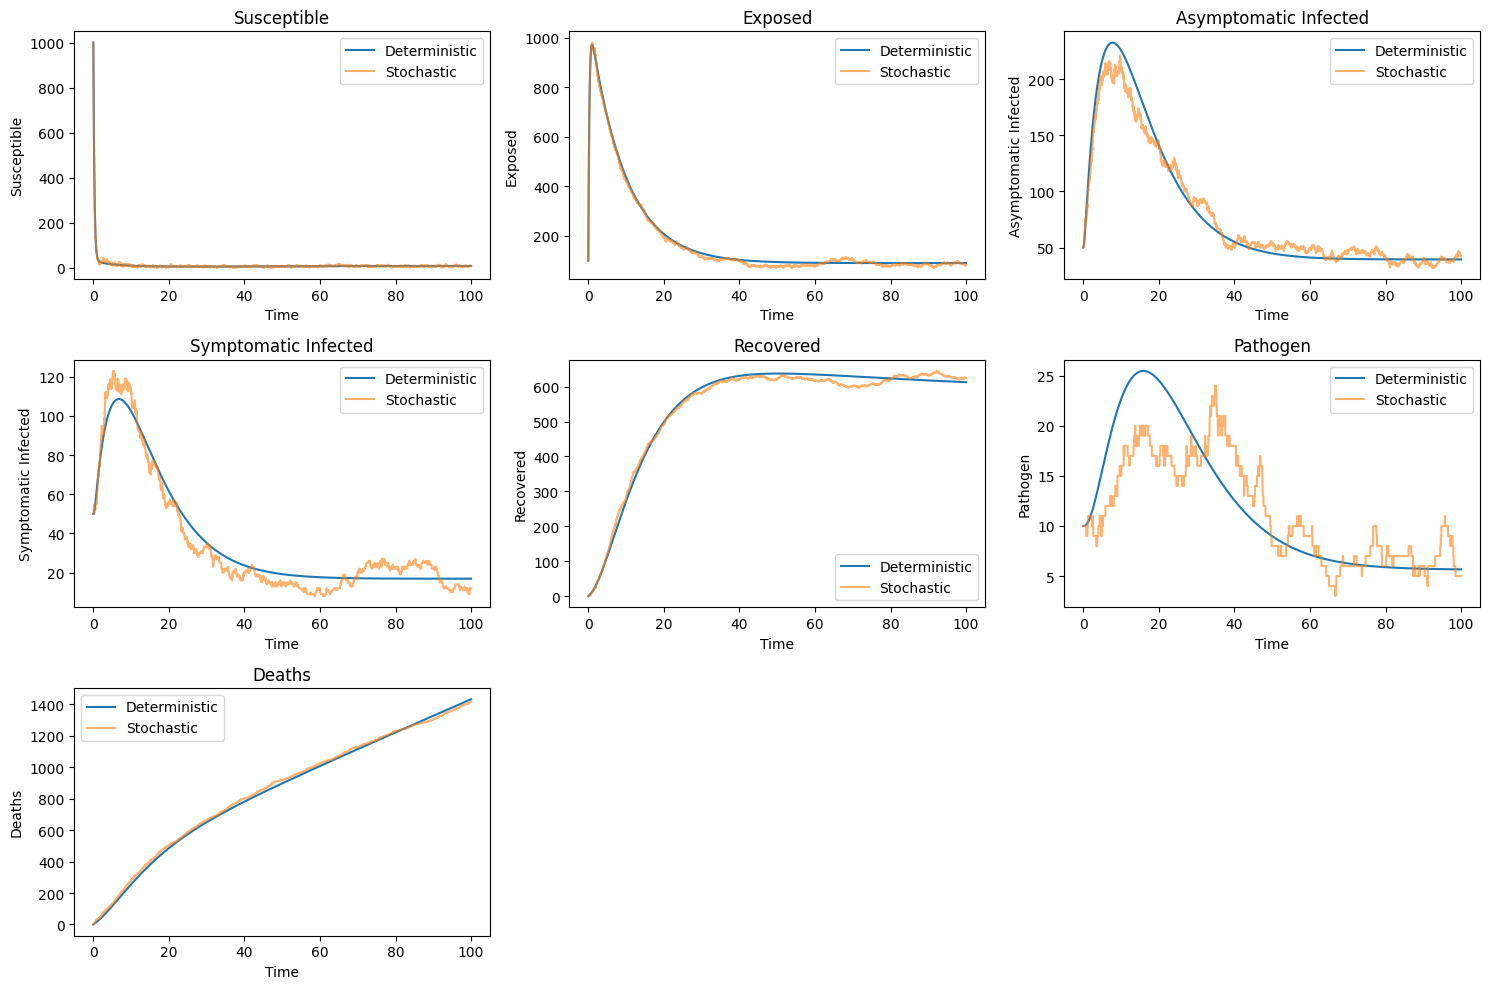

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import random

# Parameters
b = 10
beta1 = 0.1
beta2 = 0.05
alpha1 = 0.01
alpha2 = 0.01
psi = 0.1
mu = 0.01
omega = 0.1
delta = 0.3
sigma = 0.05
gamma_A = 0.1
gamma_S = 0.1
eta_A = 0.01
eta_S = 0.01
mu_P = 0.1

# Initial values
initial_S = 1000
initial_E = 100
initial_I_A = 50
initial_I_S = 50
initial_R = 0
initial_P = 10
initial_D = 0

# Time points for deterministic model
t = np.linspace(0, 100, 1000)

# Differential equations for deterministic model
def model(y, t, b, beta1, beta2, alpha1, alpha2, psi, mu, omega, delta, sigma, gamma_A, gamma_S, eta_A, eta_S, mu_P):
    S, E, I_A, I_S, R, P, D = y
    dSdt = b - (beta1 * S * P) / (1 + alpha1 * P) - (beta2 * S * (I_A + I_S)) / (1 + alpha2 * (I_A + I_S)) + psi * E - mu * S
    dEdt = (beta1 * S * P) / (1 + alpha1 * P) + (beta2 * S * (I_A + I_S)) / (1 + alpha2 * (I_A + I_S)) - psi * E - mu * E - omega * E
    dI_Adt = (1 - delta) * omega * E - (mu + sigma) * I_A - gamma_A * I_A
    dI_Sdt = delta * omega * E - (mu + sigma) * I_S - gamma_S * I_S
    dRdt = gamma_S * I_S + gamma_A * I_A - mu * R
    dPdt = eta_A * I_A + eta_S * I_S - mu_P * P
    dDdt = mu * S + mu * E + (mu + sigma) * I_A + (mu + sigma) * I_S + mu * R
    return [dSdt, dEdt, dI_Adt, dI_Sdt, dRdt, dPdt, dDdt]

# Initial condition vector for deterministic model
y0 = [initial_S, initial_E, initial_I_A, initial_I_S, initial_R, initial_P, initial_D]

# Integrate the ODEs for deterministic model
solution = odeint(model, y0, t, args=(b, beta1, beta2, alpha1, alpha2, psi, mu, omega, delta, sigma, gamma_A, gamma_S, eta_A, eta_S, mu_P))
S_det, E_det, I_A_det, I_S_det, R_det, P_det, D_det = solution.T

# Time parameters for stochastic model
max_time = 100
time = 0

# Initial values for stochastic model
S = initial_S
E = initial_E
I_A = initial_I_A
I_S = initial_I_S
R = initial_R
P = initial_P
D = initial_D

# Lists to store populations over time for stochastic model
times = [time]
S_list = [S]
E_list = [E]
I_A_list = [I_A]
I_S_list = [I_S]
R_list = [R]
P_list = [P]
D_list = [D]

# Gillespie algorithm for stochastic model
while time < max_time:
    # Calculate propensities
    a1 = b
    a2 = (beta1 * S * P) / (1 + alpha1 * P)
    a3 = (beta2 * S * (I_A + I_S)) / (1 + alpha2 * (I_A + I_S))
    a4 = (1 - delta) * omega * E
    a5 = delta * omega * E
    a6 = gamma_A * I_A
    a7 = gamma_S * I_S
    a8 = mu * S
    a9 = mu * E
    a10 = (mu + sigma) * I_A
    a11 = (mu + sigma) * I_S
    a12 = mu * R
    a13 = mu_P * P
    a14 = eta_A * I_A
    a15 = eta_S * I_S
    a16 = psi * E

    # Total propensity
    a0 = a1 + a2 + a3 + a4 + a5 + a6 + a7 + a8 + a9 + a10 + a11 + a12 + a13 + a14 + a15 + a16

    # Generate random numbers
    r1 = random.uniform(0, 1)
    r2 = random.uniform(0, 1)

    # Time until next event
    tau = (1 / a0) * np.log(1 / r1)
    time += tau

    # Determine next event
    cumulative_propensity = 0
    event = 0
    for i, a in enumerate([a1, a2, a3, a4, a5, a6, a7, a8, a9, a10, a11, a12, a13, a14, a15, a16]):
        cumulative_propensity += a
        if r2 * a0 < cumulative_propensity:
            event = i + 1
            break

    # Update state variables according to the event
    if event == 1:
        S += 1
    elif event == 2 or event == 3:
        S -= 1
        E += 1
    elif event == 4:
        E -= 1
        I_A += 1
    elif event == 5:
        E -= 1
        I_S += 1
    elif event == 6:
        I_A -= 1
        R += 1
    elif event == 7:
        I_S -= 1
        R += 1
    elif event == 8:
        S -= 1
        D += 1
    elif event == 9:
        E -= 1
        D += 1
    elif event == 10:
        I_A -= 1
        D += 1
    elif event == 11:
        I_S -= 1
        D += 1
    elif event == 12:
        R -= 1
        D += 1
    elif event == 13:
        P -= 1
    elif event == 14 or event == 15:
        P += 1
    elif event == 16:
        E -= 1
        S += 1

    # Ensure no negative populations
    S = max(0, S)
    E = max(0, E)
    I_A = max(0, I_A)
    I_S = max(0, I_S)
    R = max(0, R)
    P = max(0, P)
    D = max(0, D)

    # Record the population at this time point
    times.append(time)
    S_list.append(S)
    E_list.append(E)
    I_A_list.append(I_A)
    I_S_list.append(I_S)
    R_list.append(R)
    P_list.append(P)
    D_list.append(D)

# Plotting the results
compartments = ['Susceptible', 'Exposed', 'Asymptomatic Infected', 'Symptomatic Infected', 'Recovered', 'Pathogen', 'Deaths']
deterministic_data = [S_det, E_det, I_A_det, I_S_det, R_det, P_det, D_det]
stochastic_data = [S_list, E_list, I_A_list, I_S_list, R_list, P_list, D_list]

plt.figure(figsize=(15, 10))
for i, compartment in enumerate(compartments):
    plt.subplot(3, 3, i + 1)
    plt.plot(t, deterministic_data[i], label='Deterministic')
    plt.plot(times, stochastic_data[i], label='Stochastic', alpha=0.6)
    plt.xlabel('Time')
    plt.ylabel(compartment)
    plt.legend()
    plt.title(compartment)
plt.tight_layout()
plt.show()
